In [2]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import LabelBinarizer

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score

from pandas import read_csv, unique

import numpy as np
import pandas as pd

from scipy.interpolate import interp1d
from scipy.stats import mode

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from tensorflow import stack
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense
from keras.layers import Dense, GlobalAveragePooling1D, BatchNormalization, MaxPool1D, Reshape, Activation
from tensorflow.keras.layers import Conv1D, Flatten, Reshape, MaxPooling1D
from keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

In [4]:
features = ['Time', 'ankle-x', 'ankle-y', 'ankle-z', 
            'thigh-x', 'thigh-y', 'thigh-z',
            'trunk-x', 'trunk-y', 'trunk-z', 'status','user_number']

     

In [5]:

df = pd.read_csv("/Users/ohheungchan/workspace/AI_Study/Paperwork/combined_data.csv", delimiter=',', header=None, names=features, encoding='utf-8')  
df = df.drop(df.index[0])
df

/var/folders/9x/8whwzmnj6z5bjc7_h1txd9_r0000gn/T/ipykernel_2463/455613397.py:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/ohheungchan/workspace/AI_Study/Paperwork/combined_data.csv", delimiter=',', header=None, names=features, encoding='utf-8')


,Time,ankle-x,ankle-y,ankle-z,thigh-x,thigh-y,thigh-z,trunk-x,trunk-y,trunk-z,status,user_number
1,15,0,0,0,-100,0,-969,0,0,0,0,10
2,31,0,0,0,-100,0,-969,0,0,0,0,10
3,46,0,0,0,-100,9,-969,0,0,0,0,10
4,62,0,0,0,-100,9,-969,0,0,0,0,10
5,78,0,0,0,-109,9,-1000,0,0,0,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...
1917883,1574093,50,39,-970,54,37,-989,330,-123,-922,0,5
1917884,1574109,60,29,-960,36,55,-979,339,-123,-902,0,5
1917885,1574125,60,39,-940,36,55,-1000,339,-123,-912,0,5
1917886,1574140,60,39,-960,45,46,-959,320,-123,-912,0,5


In [6]:
df = df[df['status'] != 0]
df['status'] = df['status'].replace({1: 0, 2: 1})
df


/var/folders/9x/8whwzmnj6z5bjc7_h1txd9_r0000gn/T/ipykernel_2463/1686768610.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['status'] = df['status'].replace({1: 0, 2: 1})


,Time,ankle-x,ankle-y,ankle-z,thigh-x,thigh-y,thigh-z,trunk-x,trunk-y,trunk-z,status,user_number
1,15,0,0,0,-100,0,-969,0,0,0,0,10
2,31,0,0,0,-100,0,-969,0,0,0,0,10
3,46,0,0,0,-100,9,-969,0,0,0,0,10
4,62,0,0,0,-100,9,-969,0,0,0,0,10
5,78,0,0,0,-109,9,-1000,0,0,0,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...
1911217,1469937,343,1009,118,818,481,-50,864,485,203,0,5
1911218,1469953,313,990,128,818,527,-80,844,476,223,0,5
1911219,1469968,333,1000,108,827,500,-20,864,466,194,0,5
1911220,1469984,323,1039,108,836,500,-40,854,457,233,0,5


In [7]:
import pandas as pd

# 새로운 DataFrame을 저장할 리스트 생성
balanced_data = []

# 각 user_number별로 같은 수의 0과 1을 가진 행을 뽑아서 balanced_data에 추가
for user, group in df.groupby('user_number'):
    # user_number별로 status가 0과 1인 행 추출
    status_0 = group[group['status'] == 0]
    status_1 = group[group['status'] == 1]
    
    # 각 status에 대해 같은 수만큼 샘플링하여 balanced_data에 추가
    min_count = min(len(status_0), len(status_1))
    balanced_data.append(status_0.sample(min_count, random_state=42))
    balanced_data.append(status_1.sample(min_count, random_state=42))

# balanced_data를 하나의 DataFrame으로 병합
balanced_df = pd.concat(balanced_data)

# 결과 확인
print(balanced_df)


            Time ankle-x ankle-y ankle-z thigh-x thigh-y thigh-z trunk-x  \
1032520  1949234       0     980     346     863     259     252     155   
1078993   300578    -262    1078     316    -218    1194     -10     262   
1004989  1519062     454    1588     663    1136    1314    -121    -300   
1083559   371921   -4979    2068    -811     -90    1500    -181       9   
970405    978687    -323     990     415    -127     907     212     -97   
...          ...     ...     ...     ...     ...     ...     ...     ...   
1598733   996703     282     990       0     -81     990      90     135   
1599413  1007328    -545     529     415     200     870      80       0   
1588008   829125     151    1068       0    -281     972     101      -9   
1573964   609687      90    1039     188    -390     870     151      38   
1660306  1958781     303    1166    -108    -181    1092     212     184   

        trunk-y trunk-z status user_number  
1032520     990     184      0           1

In [8]:
balanced_df['user_number'].value_counts()

user_number
5    60740
3    36680
9    34574
8    25718
2    23218
6    16826
1    13388
7    10426
Name: count, dtype: int64

In [9]:
df=balanced_df

In [12]:
X=df.drop('status',axis=1)
X

,Time,ankle-x,ankle-y,ankle-z,thigh-x,thigh-y,thigh-z,trunk-x,trunk-y,trunk-z,user_number
1032520,1949234,0,980,346,863,259,252,155,990,184,1
1078993,300578,-262,1078,316,-218,1194,-10,262,1209,184,1
1004989,1519062,454,1588,663,1136,1314,-121,-300,1095,-87,1
1083559,371921,-4979,2068,-811,-90,1500,-181,9,1590,77,1
970405,978687,-323,990,415,-127,907,212,-97,1104,-9,1
...,...,...,...,...,...,...,...,...,...,...,...
1598733,996703,282,990,0,-81,990,90,135,1028,-9,9
1599413,1007328,-545,529,415,200,870,80,0,1038,-19,9
1588008,829125,151,1068,0,-281,972,101,-9,961,58,9
1573964,609687,90,1039,188,-390,870,151,38,923,58,9


In [13]:
X=X.drop('user_number',axis=1)
X

,Time,ankle-x,ankle-y,ankle-z,thigh-x,thigh-y,thigh-z,trunk-x,trunk-y,trunk-z
1032520,1949234,0,980,346,863,259,252,155,990,184
1078993,300578,-262,1078,316,-218,1194,-10,262,1209,184
1004989,1519062,454,1588,663,1136,1314,-121,-300,1095,-87
1083559,371921,-4979,2068,-811,-90,1500,-181,9,1590,77
970405,978687,-323,990,415,-127,907,212,-97,1104,-9
...,...,...,...,...,...,...,...,...,...,...
1598733,996703,282,990,0,-81,990,90,135,1028,-9
1599413,1007328,-545,529,415,200,870,80,0,1038,-19
1588008,829125,151,1068,0,-281,972,101,-9,961,58
1573964,609687,90,1039,188,-390,870,151,38,923,58


In [14]:
import numpy as np

# 데이터프레임에서 'status' 열을 가져옵니다.
y = df['status']
# 2차원 배열로 변환합니다.
y = np.array(y).reshape(-1, 1)
y


array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [15]:
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify= y)
X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size = 0.2, stratify= y_train )
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(141804, 10) (141804, 1)
(44314, 10) (44314, 1)


In [16]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
enc.fit(y_train)

y_train_hot = enc.transform(y_train) 
y_test_hot = enc.transform(y_test) 
y_val_hot = enc.transform(y_val)

In [17]:
n_features, n_outputs = X_train.shape[1], y_train_hot.shape[1]
n_features , n_outputs

(10, 2)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 221570 entries, 1032520 to 1660306
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype
---  ------       --------------   -----
 0   Time         221570 non-null  int64
 1   ankle-x      221570 non-null  int64
 2   ankle-y      221570 non-null  int64
 3   ankle-z      221570 non-null  int64
 4   thigh-x      221570 non-null  int64
 5   thigh-y      221570 non-null  int64
 6   thigh-z      221570 non-null  int64
 7   trunk-x      221570 non-null  int64
 8   trunk-y      221570 non-null  int64
 9   trunk-z      221570 non-null  int64
 10  status       221570 non-null  int64
 11  user_number  221570 non-null  int64
dtypes: int64(12)
memory usage: 22.0 MB


In [11]:
# 모든 열의 데이터 유형을 int로 변환
df = df.astype(int)


In [19]:
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Input
from keras.layers import Dense, Flatten, Dropout


In [20]:
model = keras.Sequential()
model.add(keras.layers.Dense(50, activation='relu', input_shape=(n_features,)))
model.add(Flatten())
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Metal device set to: Apple M2 Pro
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                550       
                                                                 
 flatten (Flatten)           (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 2)                 102       
                                                                 
Total params: 652
Trainable params: 652
Non-trainable params: 0
_________________________________________________________________


2024-04-02 15:46:48.972356: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-04-02 15:46:48.972688: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [21]:
train_epochs = 10
history = model.fit(X_train, y_train_hot, epochs=train_epochs, verbose=True,  validation_split = 0.2)

Epoch 1/10


2024-04-02 15:46:50.384535: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-04-02 15:46:50.596530: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


3546/3546 [==============================] - ETA: 0s - loss: 1048.3593 - accuracy: 0.5701

2024-04-02 15:47:07.500690: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


3546/3546 [==============================] - 20s 6ms/step - loss: 1048.3593 - accuracy: 0.5701 - val_loss: 86.3529 - val_accuracy: 0.6628
Epoch 2/10
3546/3546 [==============================] - 18s 5ms/step - loss: 216.5758 - accuracy: 0.5911 - val_loss: 222.4268 - val_accuracy: 0.6643
Epoch 3/10
3546/3546 [==============================] - 17s 5ms/step - loss: 198.1682 - accuracy: 0.5959 - val_loss: 588.9793 - val_accuracy: 0.4972
Epoch 4/10
3546/3546 [==============================] - 17s 5ms/step - loss: 197.7672 - accuracy: 0.5942 - val_loss: 67.3068 - val_accuracy: 0.6655
Epoch 5/10
3546/3546 [==============================] - 18s 5ms/step - loss: 195.1853 - accuracy: 0.5997 - val_loss: 358.8943 - val_accuracy: 0.4977
Epoch 6/10
3546/3546 [==============================] - 18s 5ms/step - loss: 191.9670 - accuracy: 0.5996 - val_loss: 55.4340 - val_accuracy: 0.6105
Epoch 7/10
3546/3546 [==============================] - 18s 5ms/step - loss: 188.1230 - accuracy: 0.5990 - val_loss: 89

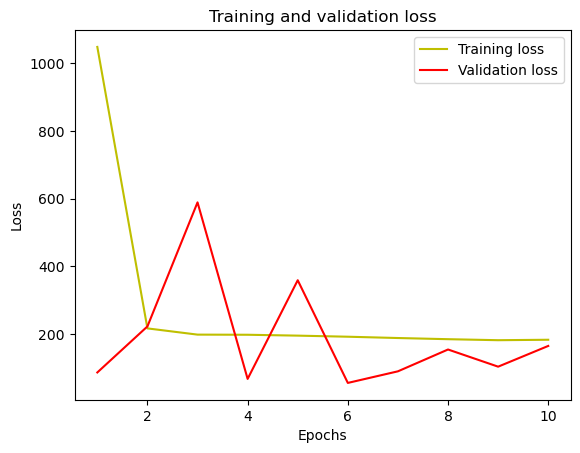

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

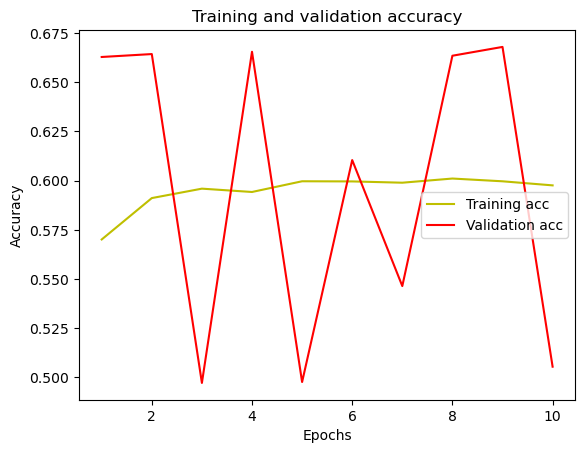

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

 106/1385 [=>............................] - ETA: 1s

2024-04-02 15:49:57.325227: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1385/1385 [==============================] - 2s 1ms/step
f1_score =  0.3840830319088284
0.5072437604368822
              precision    recall  f1-score   support

           0       0.50      0.95      0.66     22157
           1       0.57      0.06      0.11     22157

    accuracy                           0.51     44314
   macro avg       0.54      0.51      0.38     44314
weighted avg       0.54      0.51      0.38     44314



<Axes: >

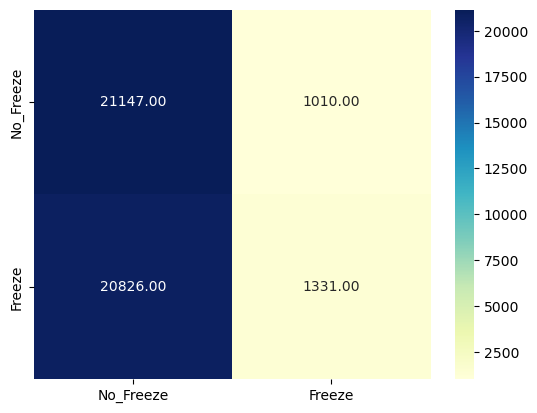

In [24]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)

LABELS = ['No_Freeze','Freeze']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_true, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')